In [ ]:
import json
import sys
sys.path.append('/Users/wastechs/Documents/git-repos/energy-efficiency')
from validation.gp.create_train_inference import create_train_inference_gp
from lib.util import helper, data_preprocessing
import torch
import gpytorch

### Preprocess Data

In [ ]:
X_train, y_train, X_test, y_test, n_train = data_preprocessing.gp_preprocess(
    machine='og_30T', 
    freq=30,
    normalize_time=True
    )

### 30 minutes agg.

In [ ]:
## Locally Periodic Kernel ##
period_constraint_short = gpytorch.constraints.Interval(0.07, 0.11) ## short term

seasonal_periodic_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_short
        )
    )

seasonal_rbf_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
)

locally_short_periodic = seasonal_periodic_short * seasonal_rbf_short

period_constraint_long = gpytorch.constraints.Interval(0.18, 0.21) ## long term

seasonal_periodic_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_long
        )
    )

seasonal_rbf_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
)

locally_long_periodic = seasonal_periodic_long * seasonal_rbf_long

## Local Variations ##
local_variation_alpha = gpytorch.priors.GammaPrior(1, 0.5)

local_variation = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RQKernel()
    )
    
local_variation.alpha = local_variation_alpha


covar_module = locally_short_periodic + locally_long_periodic + local_variation

### Create, Train, and Perform Inference

In [ ]:
func_preds_mean_inv, func_preds_var_inv, observed_preds, mse, mape = create_train_inference_gp(
    kernel_gen=covar_module,
    train_x=X_train,
    train_y=y_train,
    test_x=X_test,
    test_y=y_test,
    n_train=n_train,
    time_agg='30T',
    lr=0.1, 
    machine='og_1',
    update_score=False
)

In [ ]:
mse, mape

### 10 minutes agg..

In [13]:
X_train, y_train, X_test, y_test, n_train = data_preprocessing.gp_preprocess(
    machine='og_10T', 
    freq=10,
    normalize_time=True
    )

In [14]:
## Locally Periodic Kernel ##
period_constraint_short = gpytorch.constraints.Interval(0.08, 0.10) ## short term

seasonal_periodic_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_short
        )
    )

seasonal_rbf_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
)

locally_short_periodic = seasonal_periodic_short * seasonal_rbf_short

period_constraint_long = gpytorch.constraints.Interval(0.19, 0.21) ## long term

seasonal_periodic_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_long
        )
    )

seasonal_rbf_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
)

locally_long_periodic = seasonal_periodic_long * seasonal_rbf_long

## Local Variations ##
local_variation_alpha = gpytorch.priors.GammaPrior(1, 0.5)

local_variation = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RQKernel()
    )
    
local_variation.alpha = local_variation_alpha


covar_module = locally_short_periodic + locally_long_periodic + local_variation

Iter 1 , Loss = 0.8527747075820697 , Noise = 0.6932471990585327
Iter 2 , Loss = 0.8152469336750067 , Noise = 0.6444966793060303
Iter 3 , Loss = 0.7778157302990546 , Noise = 0.5982149243354797
Iter 4 , Loss = 0.7405546785322267 , Noise = 0.5543755888938904
Iter 5 , Loss = 0.7033115236404819 , Noise = 0.5129455924034119
Iter 6 , Loss = 0.6659692129749779 , Noise = 0.4738834500312805
Iter 7 , Loss = 0.6284788938170629 , Noise = 0.43713945150375366
Iter 8 , Loss = 0.5907374558472446 , Noise = 0.40265604853630066
Iter 9 , Loss = 0.5526610186134475 , Noise = 0.370368629693985
Iter 10 , Loss = 0.5142724027881606 , Noise = 0.34020644426345825
Iter 11 , Loss = 0.47558291348279436 , Noise = 0.31209295988082886
Iter 12 , Loss = 0.4366155778155219 , Noise = 0.2859469950199127
Iter 13 , Loss = 0.3975106939367669 , Noise = 0.26168352365493774
Iter 14 , Loss = 0.3583373824648847 , Noise = 0.23921489715576172
Iter 15 , Loss = 0.31913164733097626 , Noise = 0.2184518426656723
Iter 16 , Loss = 0.27998884

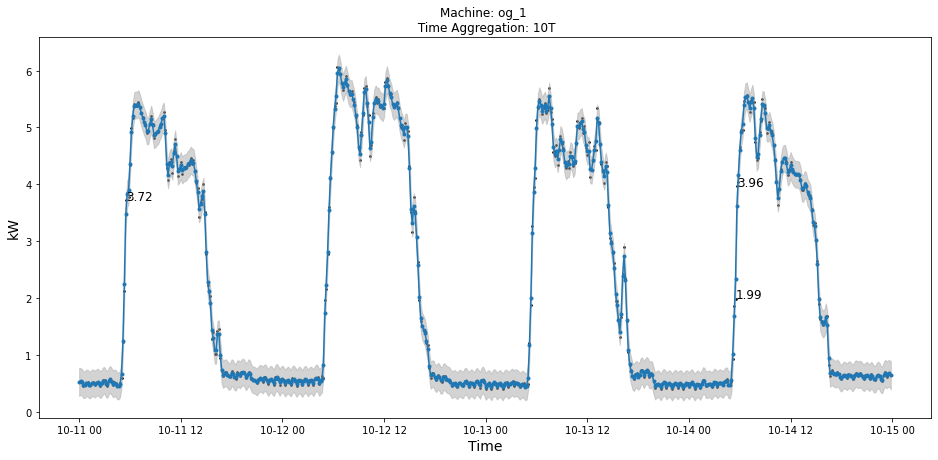

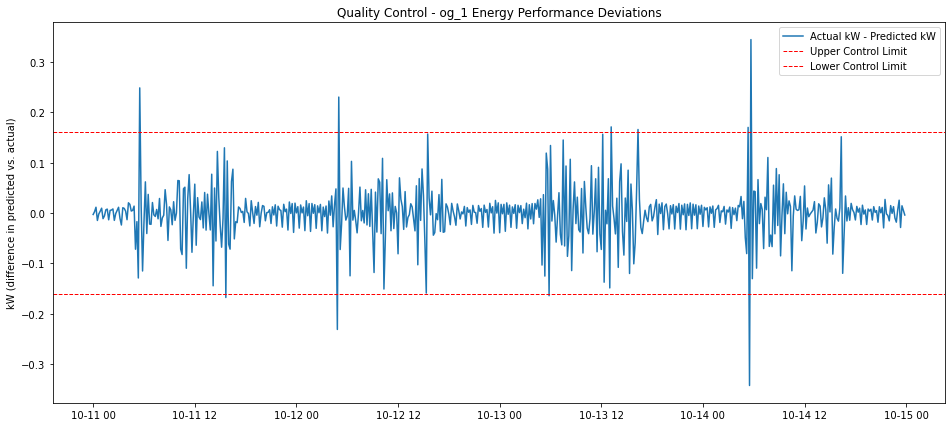

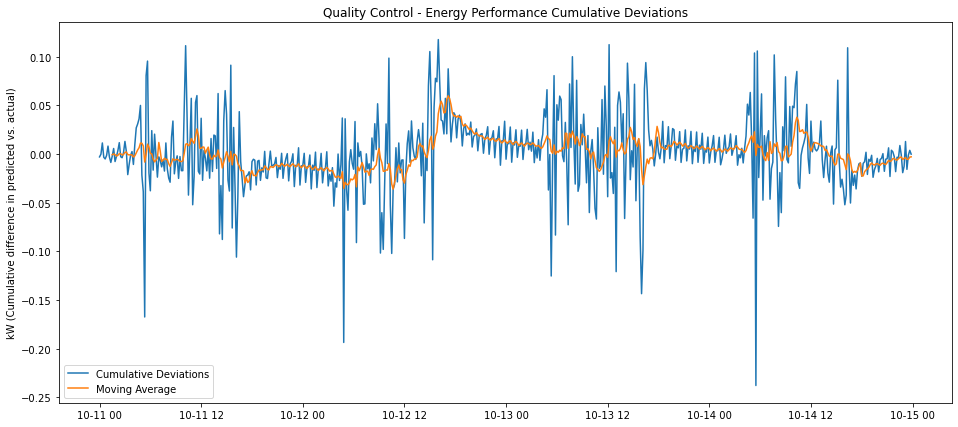

og_1
-----------------------------------
Expected next day energy consumption    =  167.563042720509 kWh
Upper bound next day energy consumption =  252.81990807852543 kWh
Lower bound next day energy consumption =  82.30617736249255 kWh


Abnormal High Energy Consumption
---------------------------------
2021-10-11 05:30:00 3.719897394843206
2021-10-14 05:40:00 3.963898592112608


Abnormal Low Energy Consumption
---------------------------------
2021-10-14 05:30:00 1.9888844424149437


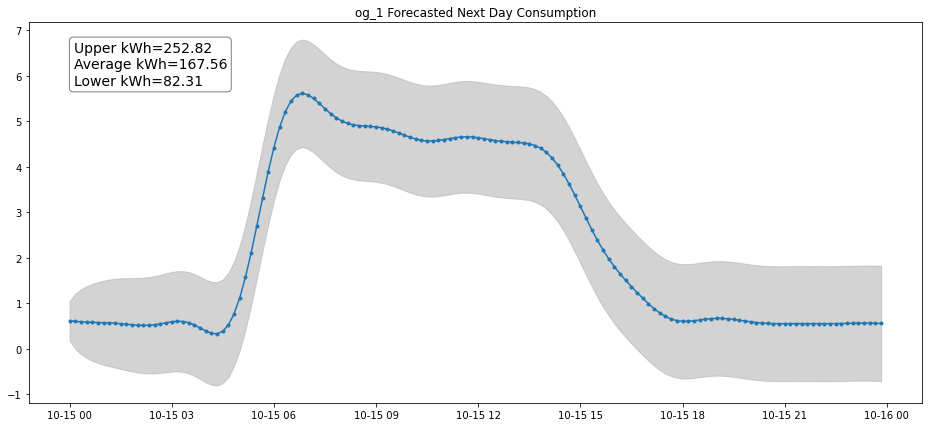

In [15]:
func_preds_mean_inv, func_preds_var_inv, observed_preds, mse, mape = create_train_inference_gp(
    kernel_gen=covar_module,
    train_x=X_train,
    train_y=y_train,
    test_x=X_test,
    test_y=y_test,
    n_train=n_train,
    time_agg='10T',
    lr=0.1, 
    machine='og_1',
    update_score=True
)

In [16]:
mse, mape

(0.1943761574390316, 0.17658017581161978)